<a href="https://colab.research.google.com/github/Sinchana-202/DSC-ML/blob/master/Beer_Consumption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BEER CONSUMPTION PREDICTION

Given data about beer consumption in Silo Paulo on different days of the year .
We have to predict the liters of beer that will be consumed on a given day.

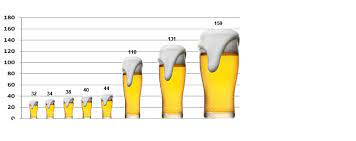

In [54]:
import numpy as np
import pandas as pd
import datetime         ### for converting to date and time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [55]:
from google.colab import files
uploaded = files.upload()

Saving Consumo_cerveja.csv to Consumo_cerveja (2).csv


In [56]:
beer_data = pd.read_csv('Consumo_cerveja.csv')

In [57]:
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


**column**  **description**

Data	                      - Date

Temperatura Media (C)       - medium Temperature

Temperatura Minima (C)      - minimum Temperature

Temperatura Maxima (C)	    - maximum Temperature

Precipitacao (mm)	          - Precipitation

Final de Semana	            - Weekend

Consumo de cerveja (litros) - Beer Consumption


In [58]:
beer_data.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [59]:
beer_data.shape

(941, 7)

In [60]:
beer_data.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [61]:
beer_data.isna().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [62]:
beer_data.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [63]:
#Dropping rows with all NAN values
beer_data.dropna(how = 'all' , inplace = True)

In [64]:
#inplacing commas with perion
beer_data.replace({',':'.'}, regex = True, inplace = True)

In [65]:
#Converting the type of Data to Date time
beer_data['Data'] = pd.to_datetime(beer_data['Data'])

In [66]:
beer_data.info()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [67]:
beer_data['Day'] = beer_data['Data'].apply(lambda a: days[a.weekday()])

In [68]:
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Monday


In [69]:
beer_data.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)', 'Day'],
      dtype='object')

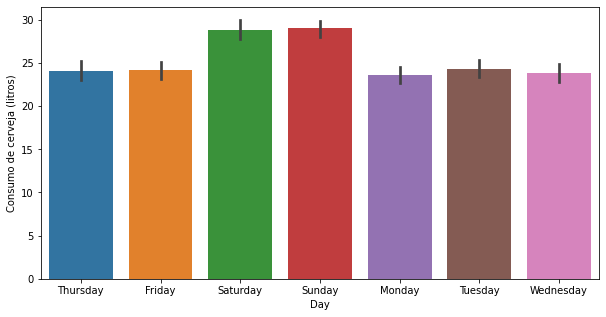

In [70]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Day", y="Consumo de cerveja (litros)", data=beer_data)

In [71]:
beer_data.drop(['Data','Day'], axis = 1,inplace = True) ## dropping date and day because we only want numeric variable

In [72]:
# coverting temperature and rainfall columns into float type
beer_data = beer_data.apply(pd.to_numeric)

In [73]:
beer_data

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


In [74]:
from sklearn.model_selection import train_test_split
x=beer_data.drop('Consumo de cerveja (litros)',axis = 1)#drop the target variables

In [75]:
y=beer_data['Consumo de cerveja (litros)']

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [79]:
from sklearn.linear_model import  LinearRegression
lr=LinearRegression()

In [81]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_pred=lr.predict(xtest)

In [84]:
y_pred

array([25.60008014, 27.06877385, 28.11275655, 21.57537646, 27.29347657,
       17.96214084, 22.43132448, 18.85518829, 18.04043779, 20.83064758,
       32.02979766, 26.88537202, 25.28984605, 25.74571583, 20.6053303 ,
       22.29514317, 28.05015283, 27.19425957, 24.65694159, 28.64238252,
       34.33046279, 21.9006268 , 29.59119372, 19.53113689, 24.87223847,
       24.69346949, 29.00415175, 30.14043339, 22.82207992, 24.11829119,
       24.5916828 , 29.61756452, 28.26128808, 32.29803338, 23.59209206,
       27.01962067, 27.46840097, 23.59248636, 25.096739  , 31.47367615,
       28.05312488, 32.00624744, 27.80995205, 24.39195411, 25.06237086,
       31.59058938, 24.73061051, 25.15557835, 26.15809444, 29.17188161,
       28.94974476, 31.74422993, 31.42553308, 33.64002652, 20.31965281,
       25.77543848, 31.14232536, 30.51589219, 27.37979187, 24.26798943,
       22.4260935 , 28.04076493, 24.78473964, 23.55530259, 29.23599875,
       29.38710822, 25.22670618, 19.81578848, 20.19980465, 23.93

In [86]:
ytest

193    25.640
33     31.655
15     29.938
309    20.575
57     26.241
        ...  
203    19.029
82     21.617
94     32.713
192    33.298
325    31.933
Name: Consumo de cerveja (litros), Length: 73, dtype: float64

In [88]:
print(lr.score(xtest,ytest))

0.7427938181737361
